In [29]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [10]:
def parser(x):
    return datetime.datetime.strptime("199"+x, "%Y-%m")

In [11]:
df = pd.read_csv('/home/datapk/datasets/shampoo.csv',
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True, 
                 date_parser=parser)

In [14]:
df.head(3)

Month
1991-01-01    266.0
1991-02-01    145.9
1991-03-01    183.1
Name: Sales, dtype: float64

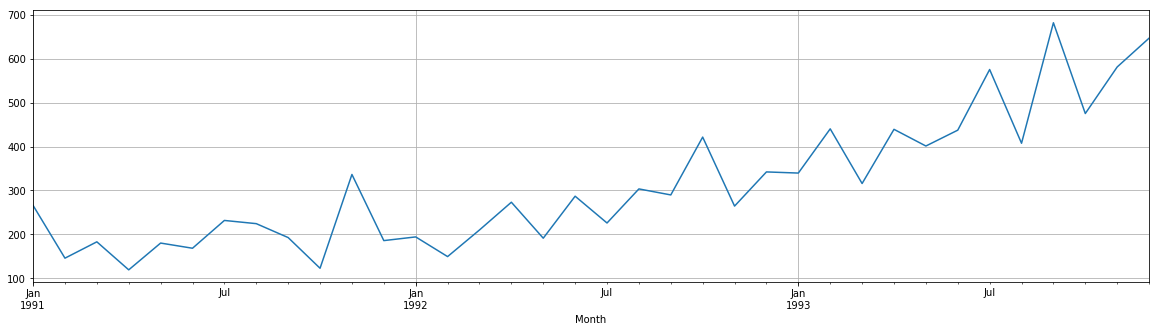

In [22]:
df.plot(figsize=(20,5))
plt.grid(True)
plt.show()

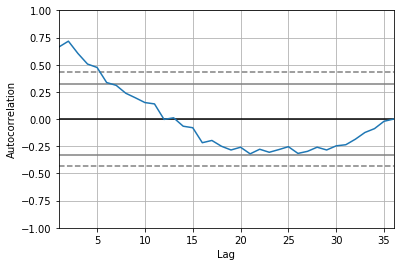

In [25]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [61]:
model = ARIMA(df, order=(1, 1, 1))

/home/datapk/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/datapk/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/datapk/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [62]:
model_fit = model.fit()

In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                Mon, 14 Sep 2020   AIC                            406.782
Time:                        15:13:26   BIC                            411.448
Sample:                    01-01-1991   HQIC                           408.393
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0425   1386.817      3.881      0.000    2663.931    8100.154
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.46   Prob(JB):                         0.45
Heteroskedasticity (H):               1.62   Skew:                             0.43
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
residuals = model_fit.resid

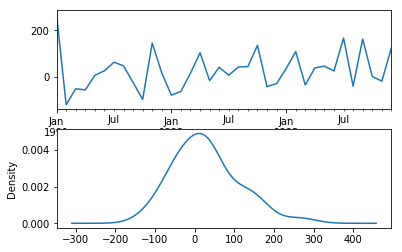

In [65]:
plt.subplot(211)
residuals.plot()
plt.subplot(212)
residuals.plot(kind='kde')
plt.show()

In [66]:
predictions = model_fit.predict()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


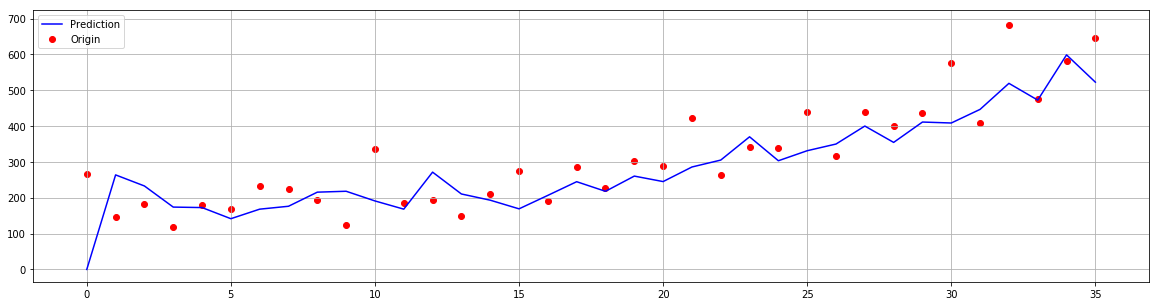

In [67]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(predictions)), predictions, c='b', label='Prediction')
plt.scatter(range(len(df)), df, c='r', label='Origin')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

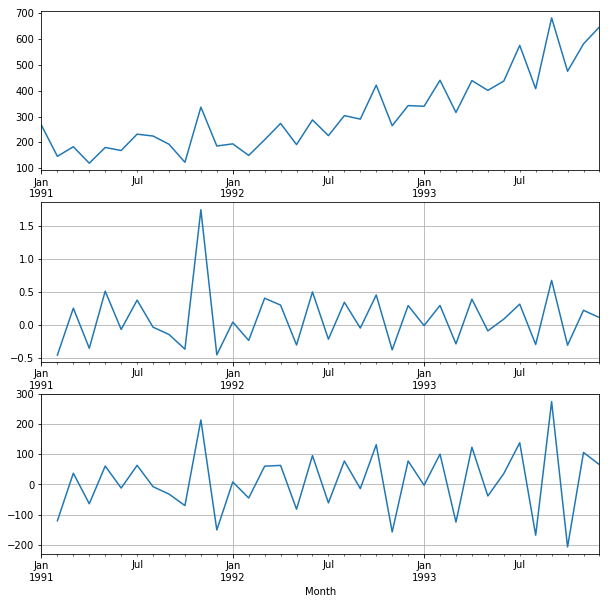

In [76]:
plt.figure(figsize=(10,10))
plt.subplot(311)
df.plot()
plt.subplot(312)
df.pct_change().plot(grid=True)
plt.subplot(313)
df.diff().plot(grid=True)
plt.show()

# Полезные ссылки

- https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/